In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

tar: MSPEC=C:\WINDOWS\sys?????: Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


In [3]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\demo_data\8.twospirals.csv",header=None)

In [4]:
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [5]:
df.shape

(2000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


<AxesSubplot:xlabel='0', ylabel='1'>

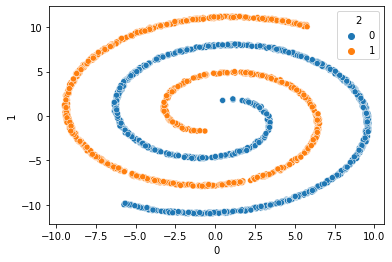

In [4]:
sns.scatterplot(x=0,y=1,hue=2,data=df)

## split into train and test

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [5]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [6]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

## build the neural networks

In [122]:
model = Sequential()
model.add(Dense(5,activation='relu',input_dim=2))
model.add(Dense(3,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [123]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 5)                 15        
                                                                 
 dense_33 (Dense)            (None, 3)                 18        
                                                                 
 dense_34 (Dense)            (None, 1)                 4         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
history = model.fit(X_train,y_train,batch_size=10,epochs=500,validation_split=0.2)

Epoch 1/500


C:\Users\palla\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


144/144 [==============================] - 1s 3ms/step - loss: 0.7391 - accuracy: 0.6035 - val_loss: 0.6537 - val_accuracy: 0.6056
Epoch 2/500
144/144 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.6396 - val_loss: 0.6376 - val_accuracy: 0.6389
Epoch 3/500
144/144 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6479 - val_loss: 0.6342 - val_accuracy: 0.6389
Epoch 4/500
144/144 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6521 - val_loss: 0.6280 - val_accuracy: 0.6389
Epoch 5/500
144/144 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.6535 - val_loss: 0.6272 - val_accuracy: 0.6361
Epoch 6/500
144/144 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.6556 - val_loss: 0.6275 - val_accuracy: 0.6472
Epoch 7/500
144/144 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.6562 - val_loss: 0.6233 - val_accuracy: 0.6444
Epoch 8/500

144/144 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.6840 - val_loss: 0.5331 - val_accuracy: 0.6444
Epoch 59/500
144/144 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.6819 - val_loss: 0.5305 - val_accuracy: 0.7111
Epoch 60/500
144/144 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.6882 - val_loss: 0.5266 - val_accuracy: 0.7028
Epoch 61/500
144/144 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.6903 - val_loss: 0.5235 - val_accuracy: 0.6944
Epoch 62/500
144/144 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.7042 - val_loss: 0.5259 - val_accuracy: 0.7167
Epoch 63/500
144/144 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.6951 - val_loss: 0.5151 - val_accuracy: 0.7278
Epoch 64/500
144/144 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7090 - val_loss: 0.5151 - val_accuracy: 0.6556
Epoch

Epoch 115/500
144/144 [==============================] - 0s 2ms/step - loss: 0.2357 - accuracy: 0.9299 - val_loss: 0.2330 - val_accuracy: 0.9250
Epoch 116/500
144/144 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9326 - val_loss: 0.2311 - val_accuracy: 0.9250
Epoch 117/500
144/144 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9326 - val_loss: 0.2284 - val_accuracy: 0.9222
Epoch 118/500
144/144 [==============================] - 0s 2ms/step - loss: 0.2281 - accuracy: 0.9306 - val_loss: 0.2252 - val_accuracy: 0.9250
Epoch 119/500
144/144 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9319 - val_loss: 0.2223 - val_accuracy: 0.9250
Epoch 120/500
144/144 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9312 - val_loss: 0.2221 - val_accuracy: 0.9250
Epoch 121/500
144/144 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9319 - val_loss: 0.2212 - val_ac

144/144 [==============================] - 0s 2ms/step - loss: 0.1737 - accuracy: 0.9333 - val_loss: 0.1833 - val_accuracy: 0.9306
Epoch 228/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9326 - val_loss: 0.1819 - val_accuracy: 0.9306
Epoch 229/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9333 - val_loss: 0.1817 - val_accuracy: 0.9306
Epoch 230/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9340 - val_loss: 0.1818 - val_accuracy: 0.9306
Epoch 231/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9354 - val_loss: 0.1824 - val_accuracy: 0.9306
Epoch 232/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9333 - val_loss: 0.1822 - val_accuracy: 0.9306
Epoch 233/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1728 - accuracy: 0.9333 - val_loss: 0.1812 - val_accuracy: 0.9306

144/144 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9417 - val_loss: 0.1719 - val_accuracy: 0.9306
Epoch 340/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9410 - val_loss: 0.1819 - val_accuracy: 0.9250
Epoch 341/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9410 - val_loss: 0.1713 - val_accuracy: 0.9306
Epoch 342/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9410 - val_loss: 0.1710 - val_accuracy: 0.9306
Epoch 343/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9403 - val_loss: 0.1715 - val_accuracy: 0.9306
Epoch 344/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9403 - val_loss: 0.1708 - val_accuracy: 0.9333
Epoch 345/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9417 - val_loss: 0.1706 - val_accuracy: 0.9333

144/144 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9424 - val_loss: 0.1659 - val_accuracy: 0.9361
Epoch 452/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.9410 - val_loss: 0.1730 - val_accuracy: 0.9306
Epoch 453/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.9417 - val_loss: 0.1681 - val_accuracy: 0.9333
Epoch 454/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.9424 - val_loss: 0.1658 - val_accuracy: 0.9361
Epoch 455/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9417 - val_loss: 0.1683 - val_accuracy: 0.9333
Epoch 456/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.9424 - val_loss: 0.1661 - val_accuracy: 0.9333
Epoch 457/500
144/144 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9410 - val_loss: 0.1718 - val_accuracy: 0.9306

In [75]:
y_cap= model.predict(X_test_trans)

7/7 [==============================] - 0s 1ms/step


In [76]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

0.655

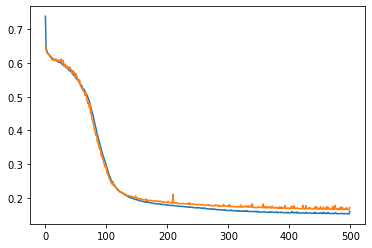

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [34]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 7s 2ms/step


<AxesSubplot:>

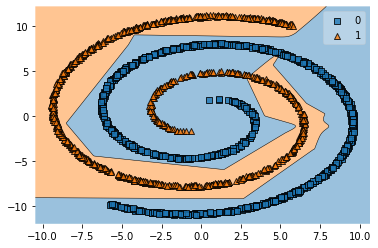

In [79]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

## Obesrvation

- here maximum points are seperated correctly with the accuracy score 46 and with the less overfitting.

## Final result:

- overall when using activation functions getting best decision surface.